# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dondi Setiawan
- **Email:** 	mc359d5y2184@student.devacademy.id
- **ID Dicoding:** MC359D5Y2184

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa kenaikan dan penuran jumlah penyewa setiap bulan pada tiap tahunnya?
- Berapa perbandingan penyewaan pada setiap musim?
- Bagaimana pengaruh kondisi cuaca terhadap penyewaan?
- Bagaimana perbandingan jumlah penyewa casual dengan registered?
- Hari apa yang memiliki jumlah penyewa tertinggi dan terendah?


## Import Semua Packages/Library yang Digunakan

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [132]:
data = pd.read_csv("/content/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Pada dataset tersebut terdapat 10 kolom, yang mana menampilkan 5 data pertama pada dataset

### Assessing Data

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [134]:
print("Jumlah duplikasi: ", data.duplicated().sum())
data.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- kolom dteday bertipe data object yang mana seharusnya datetime
- Tidak terdapat data kosong atau missing value
- Tidak terdapat data duplicate
- Tidak terdapat  inaccurate value

In [135]:
data.season.value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [136]:
data.yr.value_counts()

,count
yr,
1,366
0,365


In [137]:
data.mnth.value_counts()

,count
mnth,
1,62
3,62
5,62
7,62
8,62
10,62
12,62
4,60
6,60


In [138]:
data.holiday.value_counts()

,count
holiday,
0,710
1,21


In [139]:
data.weekday.value_counts()

,count
weekday,
6,105
0,105
1,105
2,104
3,104
4,104
5,104


In [140]:
data.weathersit.value_counts()

,count
weathersit,
1,463
2,247
3,21


In [141]:
data.workingday.value_counts()

,count
workingday,
1,500
0,231


**Insight:**
- Diketahui pada kolom season terdapat 4 value yang mana mewakilkan 4 musim.
- Diketahui pada kolom yr terdapat 2 value yaitu 0 dan 1 yang mewakilkan nilai 0 adalah 2011 dan 1 adalah 2012.
- Diketahui pada kolom mnth terdapat 12 value yang mana mewakilkan nilai bulan januari hingga desember.
- Diketahui pada kolom holiday terdapat 2 value yang mana mewakilkan nilai 0 false atau tidak libur dan 1 true atau libur.
- Diketahui pada kolom weekday terdapat 7 value yang mana mewakili nilai hari senin sampai minggu.
- Diketahui pada kolom weathersit terdapat 3 value yang mana mewakiliki nilai keadaan cuaca.
- Diketahui pada kolom workingday terdapat 2 value yang mana mewakilkan nilai 0 false  dan 1 true.

### Cleaning Data

In [142]:
data["dteday"] = pd.to_datetime(data["dteday"])

In [143]:
seasons = ['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur']
data['season'] = data['season'].apply(lambda x: seasons[x-1])

In [144]:
years = [2011, 2012]
data['yr'] = data['yr'].apply(lambda x: years[x])

In [145]:
months = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
          'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
data['mnth'] = data['mnth'].apply(lambda x: months[x - 1])

In [146]:
holidays = ['Bukan hari libur', 'Hari libur']
data['holiday'] = data['holiday'].apply(lambda x: holidays[x])

In [147]:
days = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
data['weekday'] = data['weekday'].apply(lambda x: days[x])

In [148]:
weathersits = ['Cerah', 'Berawan', 'Hujan']
data['weathersit'] = data['weathersit'].apply(lambda x: weathersits[x - 1])

In [149]:
workdays = ['Bukan Hari Kerja', 'Hari Kerja']
data['workingday'] = data['workingday'].apply(lambda x: workdays[x])

In [150]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Musim Dingin,2011,Januari,Bukan hari libur,Minggu,Bukan Hari Kerja,Berawan,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Musim Dingin,2011,Januari,Bukan hari libur,Senin,Bukan Hari Kerja,Berawan,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Musim Dingin,2011,Januari,Bukan hari libur,Selasa,Hari Kerja,Cerah,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Musim Dingin,2011,Januari,Bukan hari libur,Rabu,Hari Kerja,Cerah,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Musim Dingin,2011,Januari,Bukan hari libur,Kamis,Hari Kerja,Cerah,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipe data kolom dteday menjadi datetime
- mengganti nilai pada setiap kolom pada assesing data sebelumnya agar mudah pada saat exploratory data dan explanatory analisis. Serta, agar data bisa divisalisasikan dengan jelas

## Exploratory Data Analysis (EDA)

### Explore ...

In [152]:
data.groupby(by=["yr", "weekday"]).agg({
    "instant" : "nunique",
    "cnt" : ["sum","max", "min"]
})

instant     cnt            
             nunique     sum   max   min
yr   weekday                            
2011 Jumat        52  174552  5515   431
     Kamis        52  169169  5225   506
     Minggu       53  179743  5923   627
     Rabu         52  180338  5895   683
     Sabtu        52  182006  5538  1167
     Selasa       52  180221  6043  1000
     Senin        52  177074  5511   605
2012 Jumat        52  310843  7804  2114
     Kamis        52  303879  8173   441
     Minggu       52  298064  8714  1301
     Rabu         52  288771  7767  1013
     Sabtu        52  305784  8362  3095
     Selasa       53  275282  7525    22
     Senin        53  266953  8227  1027

**Insight:**
- Diketahui bahwa pada tahun 2011 di hari sabtu memiliki banyak penyewa dan hari di hari kamis paling sedikit penyewa dari hari yang lain.
- Diketahui bahwa pada tahun 2012 di hari jumat memiliki banyak pengunjung dan di hari senin paling sedikit penyewa dari hari yang lain.

In [153]:
data.groupby(by="season").agg({
    "instant" : "nunique",
    "cnt" : ["sum","max", "min"]
})

instant      cnt            
             nunique      sum   max   min
season                                   
Musim Dingin     181   471348  7836   431
Musim Gugur      178   841613  8555    22
Musim Panas      188  1061129  8714  1115
Musim Semi       184   918589  8362   795

**Insight:**
- Pada pivot table tersebut diketahui bahwa jumlah penyewa paling banyak terdapat pada musim panas dan paling sedikit pada musim dingin.

In [154]:
data.groupby(by="mnth").agg({
    "instant" : "nunique",
    "casual" : "sum",
    "registered" : "sum"
})

,instant,casual,registered
mnth,,,
Agustus,62,72039,279155
April,60,60802,208292
Desember,62,21693,189343
Februari,57,14963,136389
Januari,62,12042,122891
Juli,62,78157,266791
Juni,60,73906,272436
Maret,62,44444,184476
Mei,62,75285,256401


**Insight:**
- Dari pivot tabel tersebut penyewa kasual banyak yang melakukan penyewaan pada bulan juli dan paling sedikit pada bulan januari.
- Diketahui juga pada penyewa yang registered yang paling banyak melakukan penyewaan pada bukan agustus dan paling sedikit pada bulan februari.

In [155]:
data.groupby(by=["holiday", "workingday"]).agg({
    "cnt":"sum"
})

cnt
holiday          workingday               
Bukan hari libur Bukan Hari Kerja   921834
                 Hari Kerja        2292410
Hari libur       Bukan Hari Kerja    78435

**Insight:**
- Dari pivot table tersebut diketahui bahwa saat hari kerja dan bukan hari libur banyak yang melakukan penyewaan, yang mana penyewa menyewa sepeda kemungkinan untuk berakat kerja. Sedangkan, pada hari libur dan bukan hari kerja penyewa sangat sedikit yang melakukan penyewaan.

In [156]:
data.groupby(by="weathersit").agg({
    "cnt": "sum",
    "temp": ["max", "min", "mean", "std"]
})

cnt      temp                             
                sum       max      min      mean       std
weathersit                                                
Berawan      996858  0.815000  0.10750  0.470366  0.167180
Cerah       2257952  0.861667  0.05913  0.511541  0.191165
Hujan         37869  0.633913  0.21750  0.433440  0.131473

**Insight:**
- Diketahui bahwa saat cuaca cerah lebih melakukan penyewaan sedang saat hujan sedikit yang melakukan penyewaan.
- Diketahui juga standar deviasi pada saat cerah cukup tinggi yang mana ini menunjukkan bahwa suhu pada saat hari cerah beragam.

## Visualization & Explanatory Analysis

### Bagaimana Performa kenaikan dan penurunan jumlah penyewa setiap bulan pada tiap tahunnya?

<ipython-input-157-475d48ea1b52>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bulan = data_2012.resample(rule='M', on='dteday').agg({


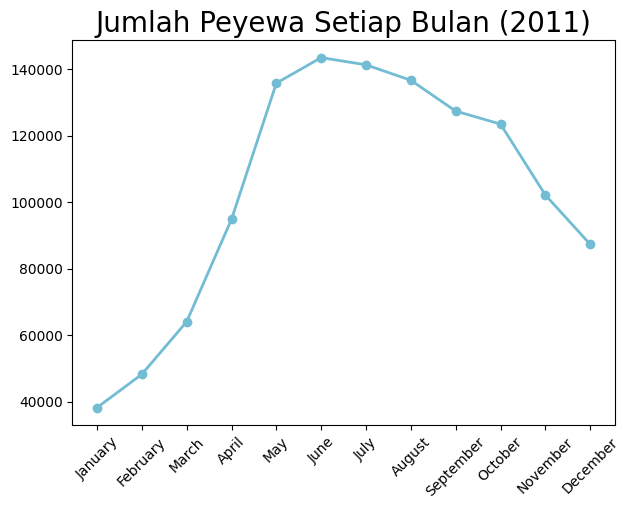

In [157]:
data_2012 = data[data['dteday'].dt.year == 2011]

bulan = data_2012.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

bulan.index = bulan.index.strftime('%B')
bulan = bulan.reset_index()

plt.figure(figsize=(7, 5))
plt.plot(bulan["dteday"], bulan["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Peyewa Setiap Bulan (2011)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

<ipython-input-158-c16d306f086b>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  bulan = data_2012.resample(rule='M', on='dteday').agg({


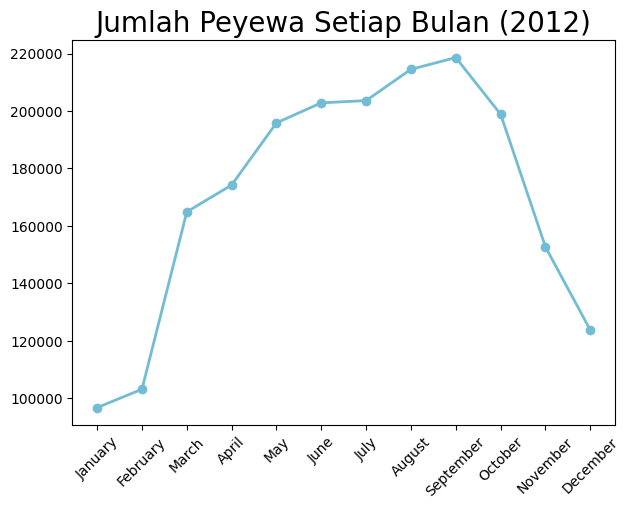

In [158]:
data_2012 = data[data['dteday'].dt.year == 2012]

bulan = data_2012.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

bulan.index = bulan.index.strftime('%B')
bulan = bulan.reset_index()

plt.figure(figsize=(7, 5))
plt.plot(bulan["dteday"], bulan["cnt"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Jumlah Peyewa Setiap Bulan (2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Dari visualisasi daitas diketahui pada tahun 2011 pada bulan january - bulan june mengalami peningkatan jumlah penyewa, kemudian jumlah penyewa turun dari bulan juli - desember.
- Diketahui juga pada tahun 2012 jumlah penyewa naik dari january - september, kemudian turun dari october - december.

### Bagaiamana perbandingan penyewaan setiap musim?

<ipython-input-159-b651fb4c9b5d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_df, x='season', y='cnt', palette=colors, legend=False)


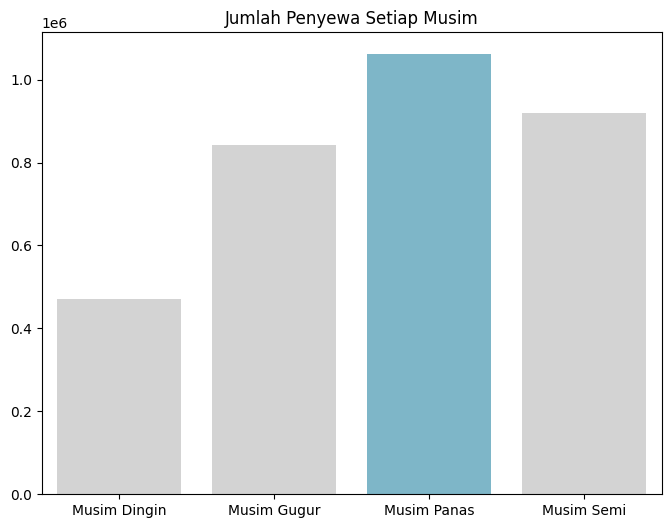

In [159]:
season_df = data.groupby(by="season").agg({"cnt":"sum"})

colors = ["#D3D3D3", "#D3D3D3", "#72BCD4", "#D3D3D3"]

plt.figure(figsize=(8, 6))
sns.barplot(data=season_df, x='season', y='cnt', palette=colors, legend=False)
plt.title('Jumlah Penyewa Setiap Musim')
plt.ylabel(None)
plt.xlabel(None)
plt.xticks()
plt.show()

**Insight:**
- Berdasarkan visualisasi data diatas dapat terlihat jumlah penyewa paling banyak pada musim panas dan paling sedikit musim dingin. Kemudian, untuk musim gugur dan musim semi jumlahnya hampir sama.

### Bagaimana pengaruh kondisi cuaca terhadap penyewaan?

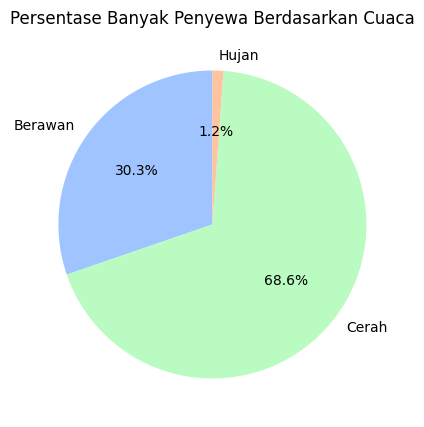

In [160]:
weather_df = data.groupby(by="weathersit").agg({"cnt": "sum"}).reset_index()

colors = ['#A0C4FF', '#B9FBC0', '#FFC3A0', '#FF677D']

plt.figure(figsize=(8, 5))
plt.pie(weather_df['cnt'], labels=weather_df['weathersit'], colors=colors,autopct='%1.1f%%', startangle=90)
plt.title('Persentase Banyak Penyewa Berdasarkan Cuaca')
plt.show()

**Insight:**
- Berdasarkan visualisasi data diatas dapat telihat penyewa sepeda lebih banyak sewa sepeda saat cuaca cerah daripada saat hujan.

### Bagaimana perbandingan jumlah penyewa casual dengan registered?

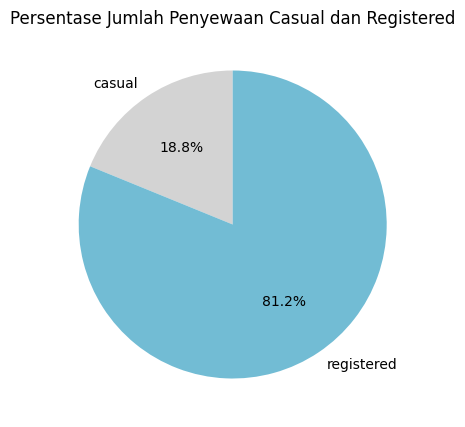

In [161]:
total_rentals = data[['casual', 'registered']].sum().reset_index()
total_rentals.columns = ['Type', 'Count']

colors = ["#D3D3D3", "#72BCD4"]

plt.figure(figsize=(8, 5))
plt.pie(total_rentals['Count'], labels=total_rentals['Type'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Persentase Jumlah Penyewaan Casual dan Registered')
plt.show()

**Insight:**
- Dikethui perbedaan jumlah persentase antara penyewa casula dengan registered cukup jauh.

### Hari mana yang memiliki jumlah penyewa tertinggi dan terendah?

<ipython-input-162-9f15c57d8a78>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=days_df, x='cnt', y='weekday', palette=colors)


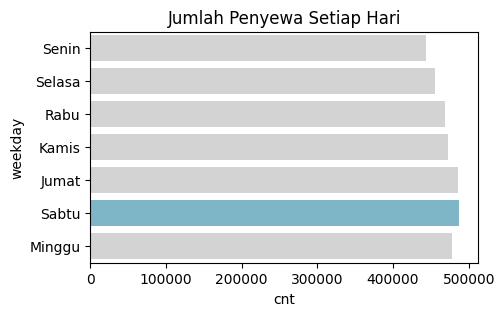

In [162]:
days_df = data.groupby(by="weekday").agg({"cnt":"sum"}).reset_index()

days_order = ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu']
days_df['weekday'] = pd.Categorical(days_df['weekday'], categories=days_order, ordered=True)

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#72BCD4", "#D3D3D3"]

plt.figure(figsize=(5, 3))
sns.barplot(data=days_df, x='cnt', y='weekday', palette=colors)
plt.title('Jumlah Penyewa Setiap Hari')
plt.xticks()
plt.show()

**Insight:**
- Berdasarkan visualisasi data tersebut sebaran jumlah penyewa hampir sama. Namun, untuk jumlah penyewa paling banyak berada dihari sabtu dan penyewa paling sedikit dihari senin.

## Conclusion

- Dari menjawab pertanyaan pertama dapat desimpulkan bahwa maksimal kenaikan jumlah penyewa pada bulan june - september. Yang mana dari bulan januari akan terus bertambah jumlah penyewa dan saat sudah tiba dibulan october akan turun.
- Dari menjawab pertanya kedua dapat disimpulkan bahwa penyewa lebih sering melakukan sewa sepeda pada saat musim panas dan musim semi, mungkin penyewa lebih merasa nyaman naik sepeda pada musim panas. Namun sebaliknya penyewa jarang melakukan sewa saat musim dingin, yang mana mungkin penyewa ingin saat cuaca nya panas atau sejuk dan jarang menyewa jika suhu dingin.
- Menjawab pertanyaan ketiga yang mana bisa juga menjawab pertanyaan sebelumnnya yang penyewa sepeda lebih luka menyewa sepeda saat cuaca cerah dan tidak jarang juga saat cuaca sedang berawan. namun, dari visualisi data tersebut penyewa sangat jarang atau sedikit menyewa sepeda pada saat hujan.
- Menjawab pertanyaa keempat dapa disimpulkan bahwa banyak penyewa sudah terdaftar terlebih dahulu sebelum melakukan penyewaan, daripada yang belum terdaftar karena perbandingan cukup jauh.
- Menjawab pertanyaan kelima untuk sebaran jumlah data hampir sama untuk setiap hari namun jumlah penyewa sepeda paling sedikit adalah hari senin kemudian hari berikutnya hingga puncaknya hari jumat dan turun sedikit pada minggu. ini memungkinkan bahwa penyewa lebih suka bersepeda hari sabtu karena mendakti hari libur.

In [163]:
data.to_csv('all_data.csv', index=False)